<a class="anchor" id="TOC"></a>
* # DOW JONES INDEX DATASET
    * ## [Dow Jones Industrial Average](#dj)
        * [Data Loading](#load)
        * [Leptokurtosis](#lepto)
        * [Autocorrelation and Partial Autocorrelation](#ACF_PACF)
        * [Arch Model](#arch)
        * [Garch Model](#garch)
        * [Garch Forecast](#garch_forecast)
        * [Seasonal Decomposition](#seasonal)
        * [Arima Model](#arima)
        * [Arima Forecast](#arima_forecast)
    * ## [30 Blue Chips](#blue_chips)
        * [Bar Plot Visualization](#bar_plot)
        * [Scatter Plot Visualization](#scatter_plot)
        * [Correlations](#correlations)
        * [Walmart](#wmt)
        * [The Home Depot](#hd)

In [1]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import scipy.stats as stats
import seaborn
import datetime as dt
import arch
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
yf.pdr_override()
seaborn.set_style('darkgrid')
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
seaborn.mpl.rcParams['font.family'] = 'sans-serif'
seaborn.mpl.rcParams['font.size'] = 14

<a class="anchor" id="dj"></a> 
# <center>DOW JONES INDUSTRIAL AVERAGE</center>
[Back to Table of Contents](#TOC)

In [2]:
local_data=pd.read_csv("dow_jones_index.data")
local_data['stock'].unique()

array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [3]:
local_data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


<a class="anchor" id="load"></a> 
# <center>DATA LOADING</center>
[Back to Table of Contents](#TOC)

[*********************100%***********************]  1 of 1 completed


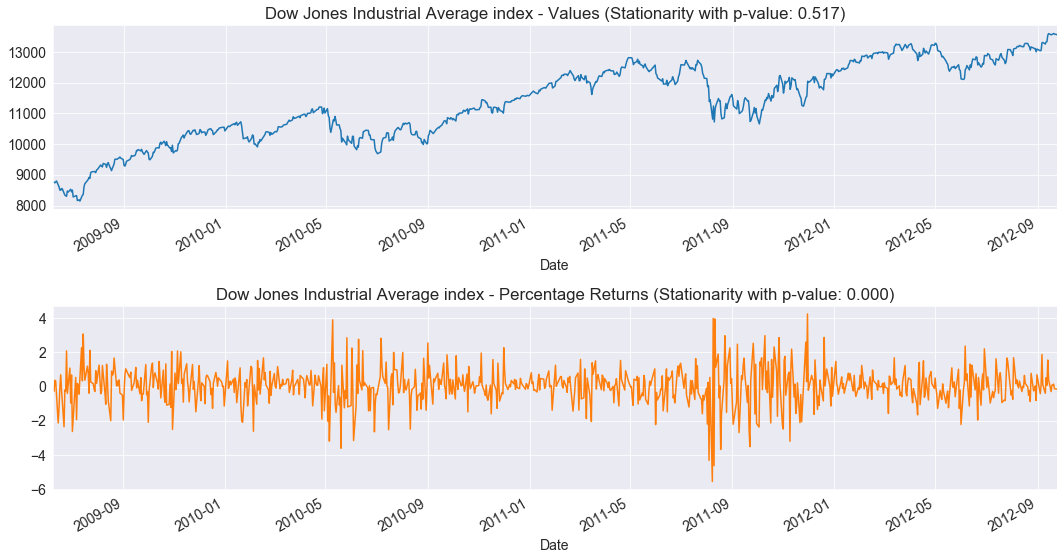

In [4]:
dj = pdr.get_data_yahoo("^DJI", start="2009-06-8", end="2012-09-25")
dj_market = dj['Adj Close']
dj_returns = 100 * dj_market.pct_change().dropna()
figure = plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.title('Dow Jones Industrial Average index - Values (Stationarity with p-value: {0:.3f})'.format(adfuller(dj_market)[1]))
dj_market.plot()
plt.subplot(2, 1, 2)
plt.title('Dow Jones Industrial Average index - Percentage Returns (Stationarity with p-value: {0:.3f})'.format(adfuller(dj_returns)[1]))
dj_returns.plot(color="tab:orange")
plt.tight_layout()
plt.show()

<a class="anchor" id="lepto"></a> 
# <center>LEPTOKURTOSIS</center>
[Back to Table of Contents](#TOC)

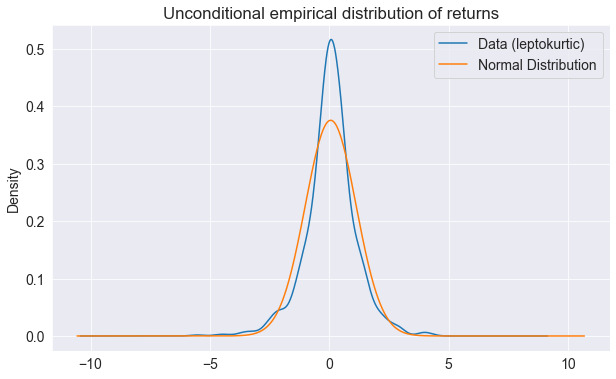

In [5]:
dj_returns.plot.kde(label='Data (leptokurtic)')
mu = dj_returns.mean()
sigma = dj_returns.std()
n_sigma=10

x = np.linspace(mu - n_sigma*sigma, mu + n_sigma*sigma, 1000)
plt.title("Unconditional empirical distribution of returns")
plt.plot(x, stats.norm.pdf(x, mu, sigma),label='Normal Distribution')
plt.legend()
plt.show()

<a class="anchor" id="ACF_PACF"></a> 
# <center>AUTOCORRELATION AND PARTIAL AUTOCORRELATION</center>
[Back to Table of Contents](#TOC)

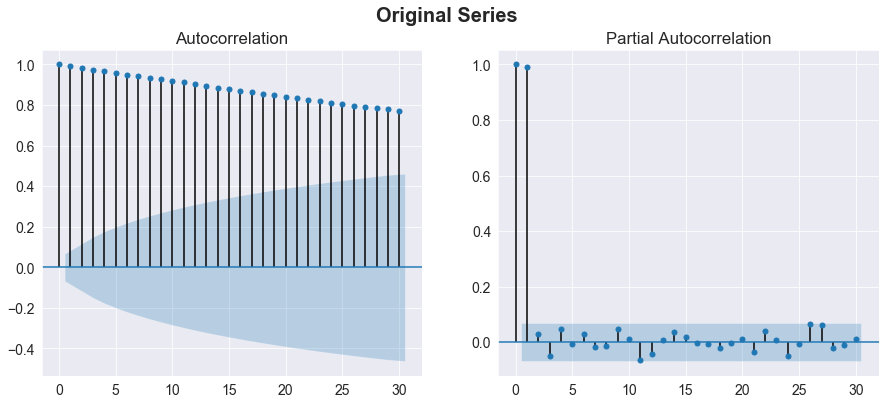

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle('Original Series', fontweight='bold', fontsize=20)
with mpl.rc_context():
    sm.graphics.tsa.plot_acf(dj_market, ax=axes[0])
    sm.graphics.tsa.plot_pacf(dj_market, ax=axes[1])

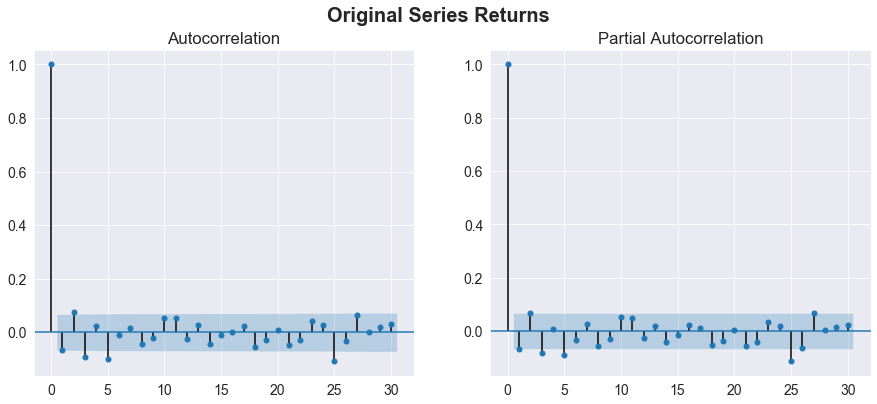

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle('Original Series Returns', fontweight='bold', fontsize=20)
with mpl.rc_context():
    sm.graphics.tsa.plot_acf(dj_returns, ax=axes[0])
    sm.graphics.tsa.plot_pacf(dj_returns, ax=axes[1])

<a class="anchor" id="arch"></a> 
# <center>ARCH MODEL</center> <br> <center> $$ \sigma_t^2 = \omega + \sum\limits_{i=1}^p \alpha_i \epsilon_{t-i}^2 $$ </center>
[Back to Table of Contents](#TOC)

In [8]:
arch_model = arch.arch_model(dj_returns, p=2, vol="ARCH")
res_arch = arch_model.fit(update_freq=0, disp='off')
print(res_arch)

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -1172.72
Distribution:                  Normal   AIC:                           2353.44
Method:            Maximum Likelihood   BIC:                           2372.34
                                        No. Observations:                  832
Date:                Tue, Jan 14 2020   Df Residuals:                      828
Time:                        16:46:11   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0848  3.340e-02      2.539  1.113e-02 [1.933e-0

<a class="anchor" id="garch"></a> 
# <center>GARCH MODEL</center> $$ \sigma_t^2= \omega + \sum\limits_{i=1}^p \alpha_i \epsilon_{t-i}^2 + \sum\limits_{k=1}^q \beta_k \sigma_{t-k}^2$$
[Back to Table of Contents](#TOC)

In [9]:
garch_model = arch.arch_model(dj_returns, p=1, q=1, vol="GARCH")
res_garch = garch_model.fit(update_freq=0, disp='off')
print(res_garch)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1134.46
Distribution:                  Normal   AIC:                           2276.91
Method:            Maximum Likelihood   BIC:                           2295.81
                                        No. Observations:                  832
Date:                Tue, Jan 14 2020   Df Residuals:                      828
Time:                        16:46:11   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0902  2.877e-02      3.136  1.715e-03 [3.382e-0

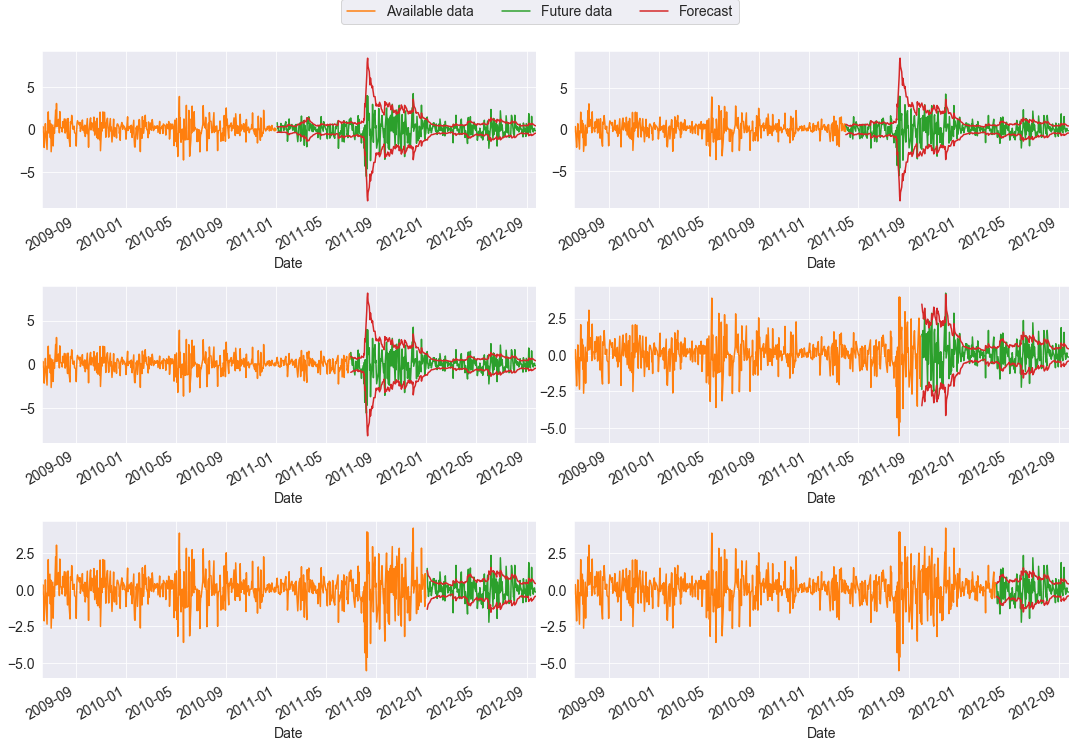

In [10]:
split_dates=[dt.datetime(2011,1,1),dt.datetime(2011,4,1),dt.datetime(2011,7,1),
             dt.datetime(2011,10,1),dt.datetime(2012,1,1),dt.datetime(2012,4,1)]
rows=3
cols=2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
for index, split_date in enumerate(split_dates):
    res_garch = garch_model.fit(update_freq=0, disp='off', last_obs=split_date)
    forecasts = res_garch.forecast(horizon=1, start=split_date)
    cur_plot = dj_returns[:split_date].plot(ax=axes[index//cols,index%cols],color="tab:orange")
    fut_plot = dj_returns[split_date:].plot(ax=axes[index//cols,index%cols],color="tab:green")
    for_plot = forecasts.variance[split_date:].plot(ax=axes[index//cols,index%cols],color="tab:red")
    (-1.0*forecasts.variance[split_date:]).plot(ax=axes[index//cols,index%cols],color="tab:red")
    axes[index//cols,index%cols].legend().remove()
    plt.tight_layout()
fig.legend([cur_plot, fut_plot, for_plot], 
           labels = ['Available data', 'Future data','Forecast'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3)
plt.show()

<a class="anchor" id="garch_forecast"></a> 
# <center>GARCH FORECAST</center>
[Back to Table of Contents](#TOC)

In [11]:
future = pdr.get_data_yahoo("^DJI", start="2012-09-26", end="2013-09-25")['Adj Close']
future_returns = 100 * future.pct_change().dropna()
future_returns

[*********************100%***********************]  1 of 1 completed


Date
2012-09-26   -0.327252
2012-09-27    0.540201
2012-09-28   -0.362153
2012-10-01    0.580336
2012-10-02   -0.242321
                ...   
2013-09-18    0.947923
2013-09-19   -0.257644
2013-09-20   -1.186067
2013-09-23   -0.321725
2013-09-24   -0.433663
Name: Adj Close, Length: 249, dtype: float64

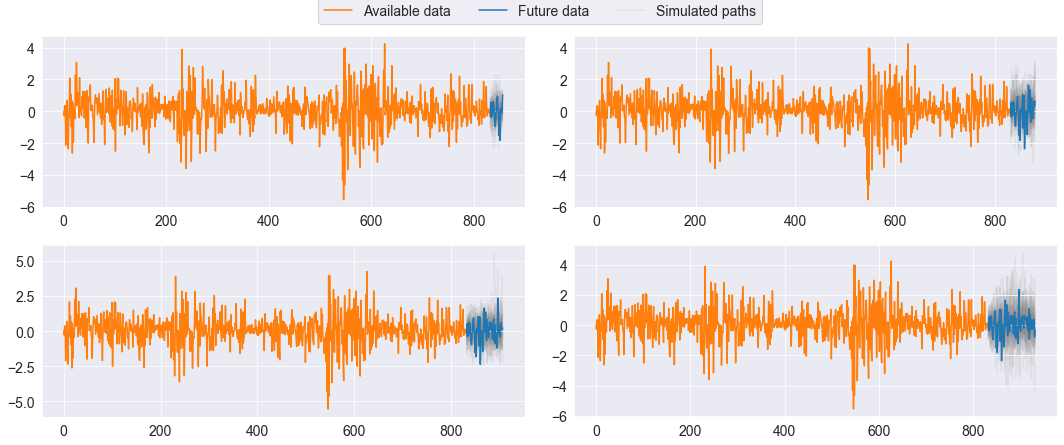

In [12]:
steps_v = [25,50,75,100]
n_sim=20
rows=2
cols=2
cur = dj_returns.values
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,6))
for index, steps in enumerate(steps_v):
    ii=index//cols
    jj=index%cols
    x=range(len(cur),len(cur)+steps)
    forecasts = res_garch.forecast(horizon=steps, method='simulation', simulations=n_sim)
    sims = forecasts.simulations.values[-1,:,:].T
    fut = future_returns[:steps].values
    cur_plot = axes[ii,jj].plot(cur,color='tab:orange')
    fut_plot = axes[ii,jj].plot(x,fut,zorder=10,color='tab:blue')
    sim_plot = axes[ii,jj].plot(x,sims, color='gray', alpha=2/n_sim, zorder=0)
plt.tight_layout()
fig.legend(labels = ['Available data','Future data','Simulated paths'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3)
plt.show()

<a class="anchor" id="seasonal"></a> 
# <center>SEASONAL DECOMPOSITION</center>
[Back to Table of Contents](#TOC)

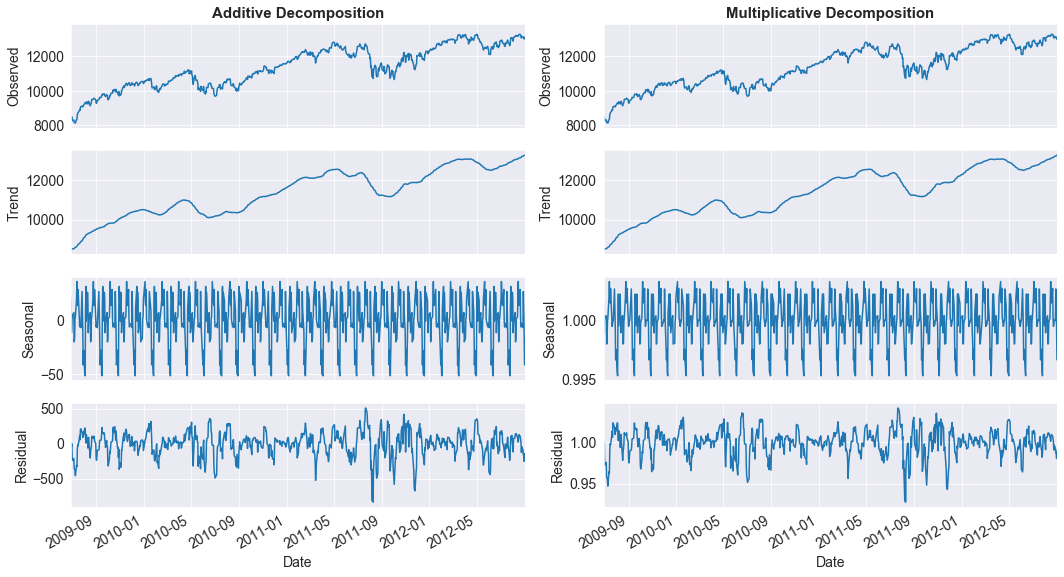

In [13]:
frequency=30
result_lin =  seasonal_decompose(dj_market.values, model="additive", freq=frequency)
result_mul =  seasonal_decompose(dj_market.values, model="multiplicative", freq=frequency) 
decs_lin = [result_lin.observed,result_lin.trend,result_lin.seasonal,result_lin.resid]
decs_mul = [result_mul.observed,result_mul.trend,result_mul.seasonal,result_mul.resid]
decs = decs_lin+decs_mul
new_decs=[]
labels=['Observed','Trend','Seasonal','Residual']
labels=labels+labels
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,8), sharex=True)
for idx, (dec,lab) in enumerate(zip(decs,labels)):
    col = 0 if idx<4 else 1
    dec = pd.Series(dec).dropna()
    dec = dec.rename(lambda x:dj_market.index[x])
    dec.index.name = 'Date'
    new_decs.append(dec)
    axes[idx%4,col].set_ylabel(lab)
    dec.plot(ax=axes[idx%4,col])
    plt.tight_layout()
axes.flatten()[:2][0].set_title("Additive Decomposition", fontweight='bold', fontsize=15)
axes.flatten()[:2][1].set_title("Multiplicative Decomposition", fontweight='bold', fontsize=15)
plt.show()

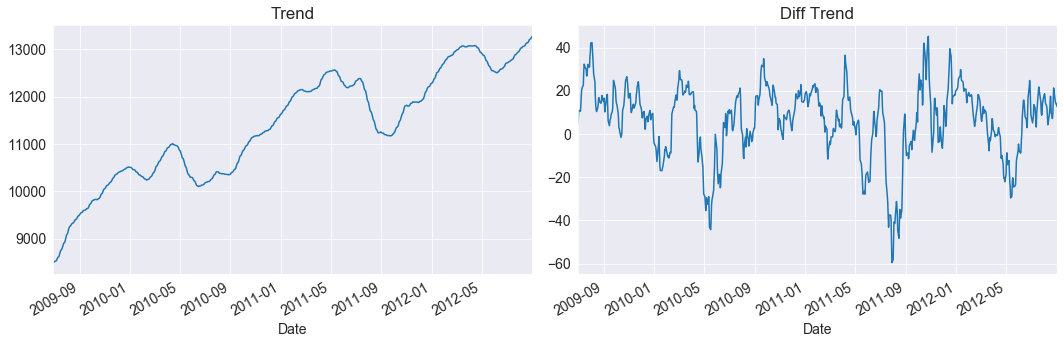

In [14]:
rows=1
cols=2
all_series = [new_decs[1], new_decs[1].diff().dropna()]
labels = ['Trend','Diff Trend']
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,5))
for index, (curr_ser,curr_label) in enumerate(zip(all_series,labels)):
    curr_ser.plot(ax=axes[index%cols],title=curr_label)
    plt.tight_layout()

<a class="anchor" id="arima"></a> 
# <center>ARIMA MODEL</center> $$ \phi(L)(1-L)^d x_t = \theta(L) \epsilon_t $$
[Back to Table of Contents](#TOC)

In [15]:
warnings.simplefilter('ignore')
model = ARIMA(new_decs[1], order=(1,1,0))
model_fit = model.fit(disp=0,trend='nc')
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  802
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2198.042
Method:                       css-mle   S.D. of innovations              3.743
Date:                Tue, 14 Jan 2020   AIC                           4400.084
Time:                        16:46:32   BIC                           4409.458
Sample:                             1   HQIC                          4403.685
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.9772      0.007    136.265      0.000       0.963       0.991
                                    Roots                                    
                  Real          Imaginary           M

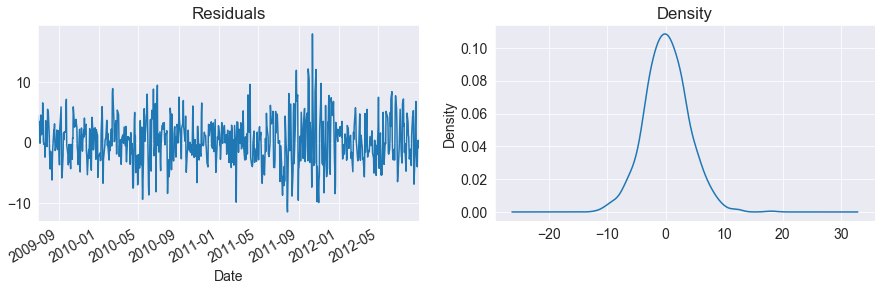

In [16]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
ax[0].legend().remove()
ax[1].legend().remove()
plt.show()

<a class="anchor" id="arima_forecast"></a> 
# <center>ARIMA FORECAST</center>
[Back to Table of Contents](#TOC)

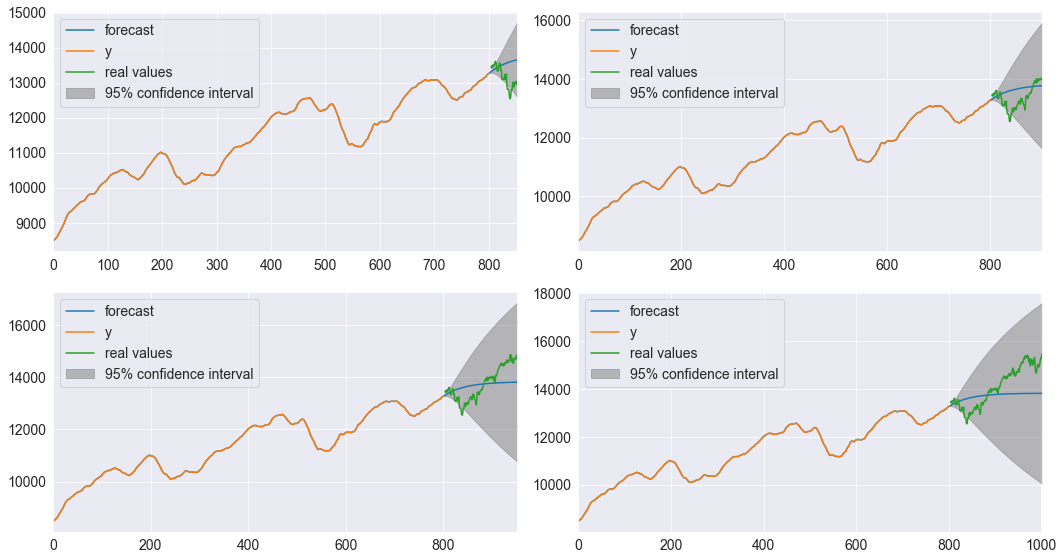

In [17]:
rows=2
cols=2
nums=[i*50 for i in range(1,5)]
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,8))
for index, num in enumerate(nums):
    model_fit.plot_predict(1, len(new_decs[1])+num, ax=axes[index//cols,index%cols])
    axes[index//cols,index%cols].plot([x+len(new_decs[1])+1 for x in range(num)],future.iloc[:num].values,label='real values')
    axes[index//cols,index%cols].legend(loc='upper left')
    plt.tight_layout()

<a class="anchor" id="blue_chips"></a> 
# <center>30 BLUE CHIPS </center>
[Back to Table of Contents](#TOC)

In [18]:
data={}
market={}
volume={}
returns={}

for chip in local_data['stock'].unique():
    if (chip=='KRFT'):
        print("Data not available")
    else:
        data[chip] = pdr.get_data_yahoo(chip, start="2009-06-8", end="2012-09-25")
        market[chip] = data[chip]['Adj Close']
        volume[chip] = data[chip]['Volume']
        returns[chip] = 100 * market[chip].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [19]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [20]:
keywords = take(len(market.keys()), market.keys())
print(keywords)

['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT', 'XOM']


In [21]:
firms=pd.DataFrame([["3M","MMM"],
["American Express","AXP"],
["Alcoa","AA"],
["AT&T","T"],
["Bank of America","BAC"],
["Boeing","BA"],
["Caterpillar","CAT"],
["Chevron","CVX"],
["Cisco Systems","CSCO"],
["Coca-Cola","KO"],
["DuPont","DD"],
["ExxonMobil","XOM"],
["General Electric","GE"],
["Hewlett-Packard","HPQ"],
["The Home Depot","HD"],
["Intel","INTC"],
["IBM","IBM"],
["Johnson & Johnson","JNJ"],
["JPMorgan Chase","JPM"],
["Kraft","KRFT"],
["McDonald's","MCD"],
["Merck","MRK"],
["Microsoft","MSFT"],
["Pfizer","PFE"],
["Procter & Gamble","PG"],
["Travelers","TRV"],
["United Technologies","UTX"],
["Verizon","VZ"],
["Wal-Mart","WMT"],
["Walt Disney","DIS"]], columns = ['Firm', 'Stock'])
firms = firms.sort_values('Stock').reset_index(drop=True)
firms['explanation']=firms['Stock'] + "=" + firms['Firm']
firms

,Firm,Stock,explanation
0,Alcoa,AA,AA=Alcoa
1,American Express,AXP,AXP=American Express
2,Boeing,BA,BA=Boeing
3,Bank of America,BAC,BAC=Bank of America
4,Caterpillar,CAT,CAT=Caterpillar
5,Cisco Systems,CSCO,CSCO=Cisco Systems
6,Chevron,CVX,CVX=Chevron
7,DuPont,DD,DD=DuPont
8,Walt Disney,DIS,DIS=Walt Disney
9,General Electric,GE,GE=General Electric


In [22]:
market_list = []
volume_list = []
returns_list = []
for ii in keywords:
    market_list.append(market[ii])
    volume_list.append(volume[ii])
    returns_list.append(returns[ii])
market_comp = pd.concat(market_list,axis=1)
market_comp.columns = keywords
market_corr = market_comp.corr()
volume_comp = pd.concat(volume_list,axis=1)
volume_comp.columns = keywords
volume_corr = volume_comp.corr()
returns_comp = pd.concat(returns_list,axis=1)
returns_comp.columns = keywords
returns_corr = returns_comp.corr()

<a class="anchor" id="bar_plot"></a> 
# <center>BAR PLOT VISUALIZATION</center>
[Back to Table of Contents](#TOC)

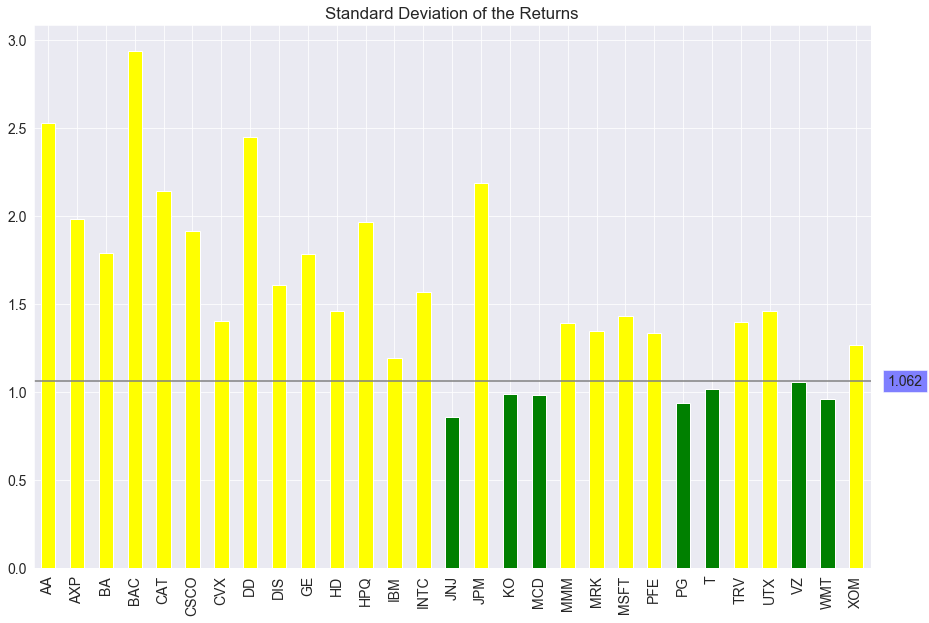

In [23]:
std_color = []
for ii in range(len(returns_comp.std())):
    if returns_comp.std().iloc[ii]>dj_returns.std():
        std_color.append('yellow')
    else:
        std_color.append('green')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Standard Deviation of the Returns")
returns_comp.std().plot(kind="bar",figsize=(15,10),ax=ax,color=std_color)
ax.axhline(dj_returns.std(), color="gray")
ax.text(1.02, dj_returns.std(), '{0:.3f}'.format(dj_returns.std()), va='center', ha="left",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_yaxis_transform())
plt.show()

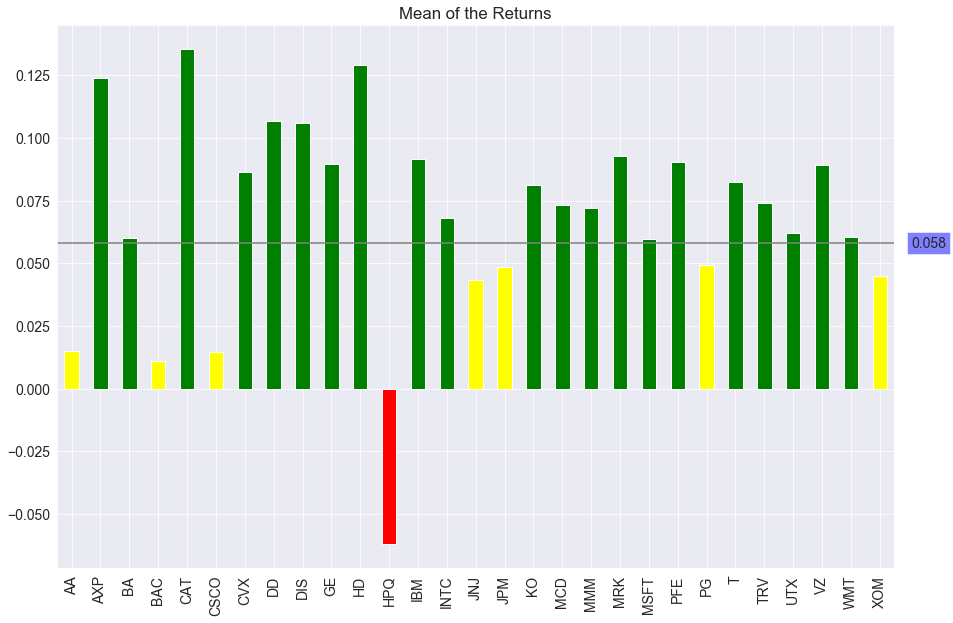

In [24]:
mean_color = []
for ii in range(len(returns_comp.mean())):
    if returns_comp.mean().iloc[ii]>dj_returns.mean():
        mean_color.append('green')
    elif returns_comp.mean().iloc[ii]<0:
        mean_color.append('red')
    else:
        mean_color.append('yellow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Mean of the Returns")
returns_comp.mean().plot(kind="bar",figsize=(15,10),ax=ax,color=mean_color)
ax.axhline(dj_returns.mean(), color="gray")
ax.text(1.02, dj_returns.mean(), '{0:.3f}'.format(dj_returns.mean()), va='center', ha="left",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_yaxis_transform())
plt.show()

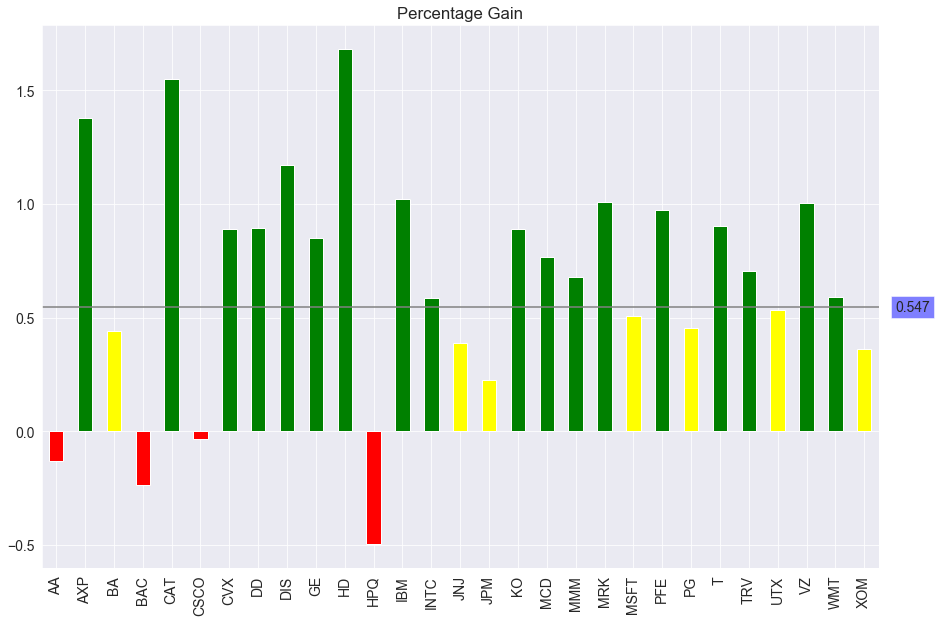

In [25]:
dj_gain=(dj_market.iloc[-1]-dj_market.iloc[0])/dj_market.iloc[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Percentage Gain")
gain = []
for ii in keywords:
    gain.append((market[ii].iloc[-1]-market[ii].iloc[0])/market[ii].iloc[0])
color_list=[]
for ii in range(len(gain)):
    if gain[ii]<0:
        color_list.append('red')
    elif gain[ii]>dj_gain:
        color_list.append('green')
    else:
        color_list.append('yellow')
pd.Series(gain,keywords).plot(kind="bar",figsize=(15,10),ax=ax,color=color_list)
ax.axhline(dj_gain, color="gray")
ax.text(1.02, dj_gain, '{0:.3f}'.format(dj_gain), va='center', ha="left",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_yaxis_transform())
plt.show()

<a class="anchor" id="scatter_plot"></a> 
# <center>SCATTER PLOT VISUALIZATION</center>
[Back to Table of Contents](#TOC)

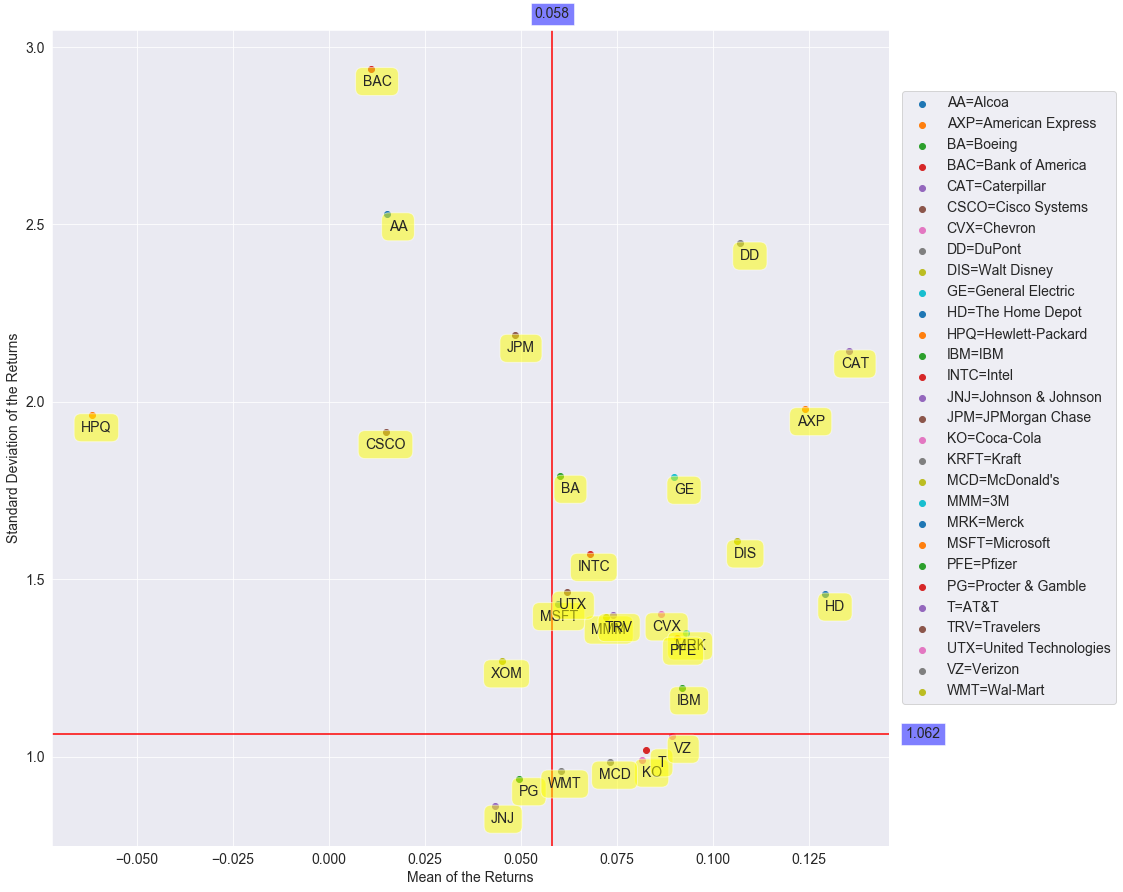

In [26]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
points = []
ax.set_xlabel('Mean of the Returns')
ax.set_ylabel('Standard Deviation of the Returns')
for label, x, y in zip(keywords, returns_comp.mean().values, returns_comp.std().values):
    cur_point = ax.scatter(x,y)
    points.append(cur_point)
    ax.annotate(label,xy = (x, y), xytext = (20, -20),textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
ax.axhline(dj_returns.std(), color="red")
ax.text(1.02, dj_returns.std(), '{0:.3f}'.format(dj_returns.std()), va='center', ha="left",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_yaxis_transform())
ax.axvline(dj_returns.mean(), color="red")
ax.text(dj_returns.mean(), 1.02,'{0:.3f}'.format(dj_returns.mean()), va='center', ha="center",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_xaxis_transform())
ax.legend(points,firms['explanation'],loc="center right",bbox_to_anchor=(1.28, 0.55))
plt.show()

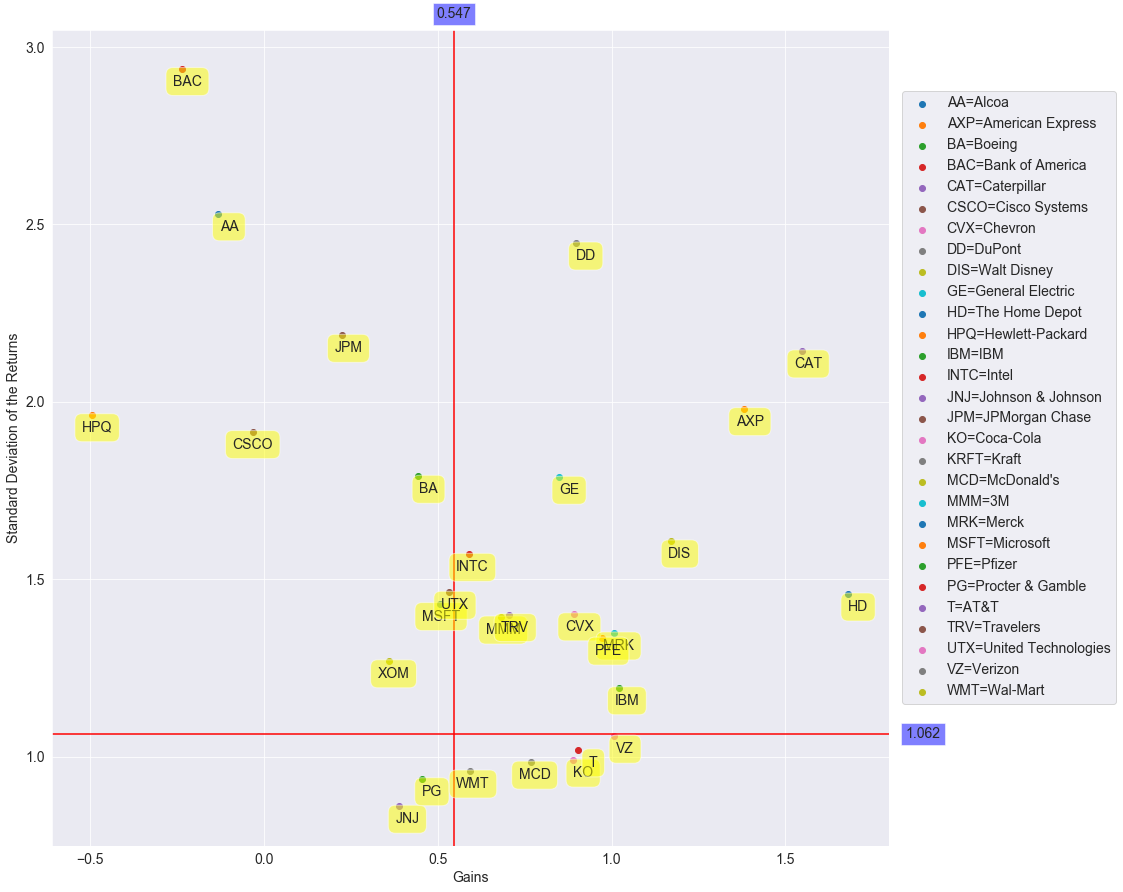

In [27]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
points = []
ax.set_xlabel('Gains')
ax.set_ylabel('Standard Deviation of the Returns')
for label, x, y in zip(keywords, gain, returns_comp.std().values):
    cur_point = ax.scatter(x,y)
    points.append(cur_point)
    ax.annotate(label,xy = (x, y), xytext = (20, -20),textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
ax.axhline(dj_returns.std(), color="red")
ax.text(1.02, dj_returns.std(), '{0:.3f}'.format(dj_returns.std()), va='center', ha="left",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_yaxis_transform())
ax.axvline(dj_gain, color="red")
ax.text(dj_gain, 1.02,'{0:.3f}'.format(dj_gain), va='center', ha="center",
        bbox=dict(facecolor="blue",alpha=0.5),transform=ax.get_xaxis_transform())
ax.legend(points,firms['explanation'],loc="center right",bbox_to_anchor=(1.28, 0.55))
plt.show()

<a class="anchor" id="correlations"></a> 
# <center>CORRELATIONS</center>
[Back to Table of Contents](#TOC)

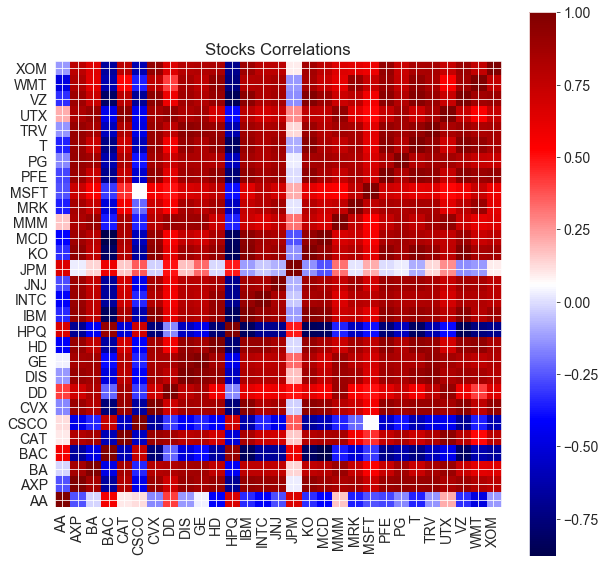

In [28]:
figure = plt.figure(figsize=(10,10))
plt.title("Stocks Correlations")
plt.imshow(market_corr, cmap='seismic', interpolation='none')
plt.xlim(-0.5,len(market_corr)-0.5)
plt.ylim(-0.5,len(market_corr)-0.5)
plt.xticks(range(len(market_corr)), market_corr.columns, rotation=90)
plt.yticks(range(len(market_corr)), market_corr.columns)
plt.colorbar()
plt.show()

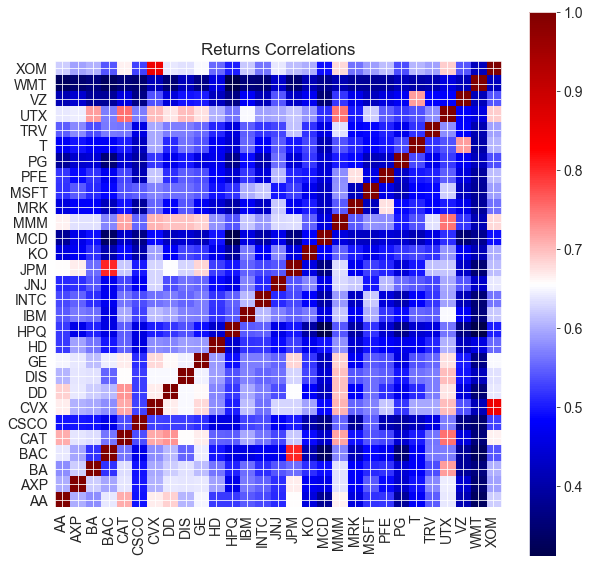

In [29]:
figure = plt.figure(figsize=(10,10))
plt.title("Returns Correlations")
plt.imshow(returns_corr, cmap='seismic', interpolation='none')
plt.xlim(-0.5,len(returns_corr)-0.5)
plt.ylim(-0.5,len(returns_corr)-0.5)
plt.xticks(range(len(returns_corr)), returns_corr.columns, rotation=90)
plt.yticks(range(len(returns_corr)), returns_corr.columns)
plt.colorbar()
plt.show()

<a class="anchor" id="wmt"></a> 
# <center>WALMART</center>
[Back to Table of Contents](#TOC)

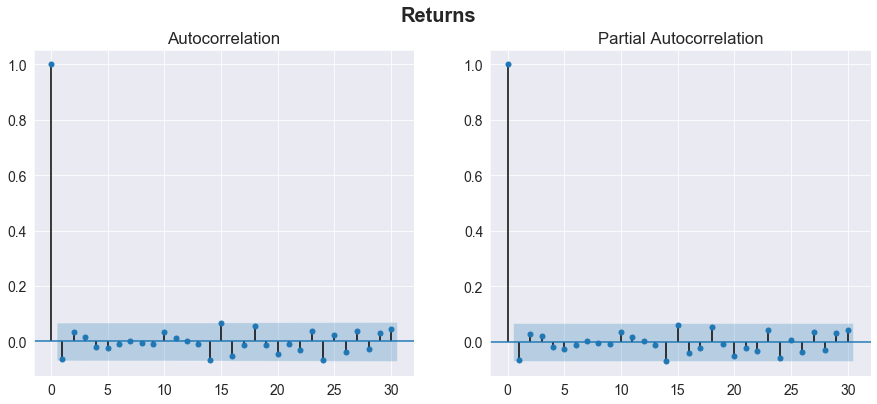

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle('Returns', fontweight='bold', fontsize=20)
with mpl.rc_context():
    sm.graphics.tsa.plot_acf(returns['WMT'], ax=axes[0])
    sm.graphics.tsa.plot_pacf(returns['WMT'], ax=axes[1])

In [31]:
garch_wmt = arch.arch_model(returns['WMT'], p=1, q=1, vol="GARCH")
res_wmt = garch_wmt.fit(update_freq=0, disp='off')
print(res_wmt)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1119.06
Distribution:                  Normal   AIC:                           2246.13
Method:            Maximum Likelihood   BIC:                           2265.02
                                        No. Observations:                  832
Date:                Tue, Jan 14 2020   Df Residuals:                      828
Time:                        16:46:48   Df Model:                            4
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0612  3.275e-02      1.869  6.161e-02 [-2.97

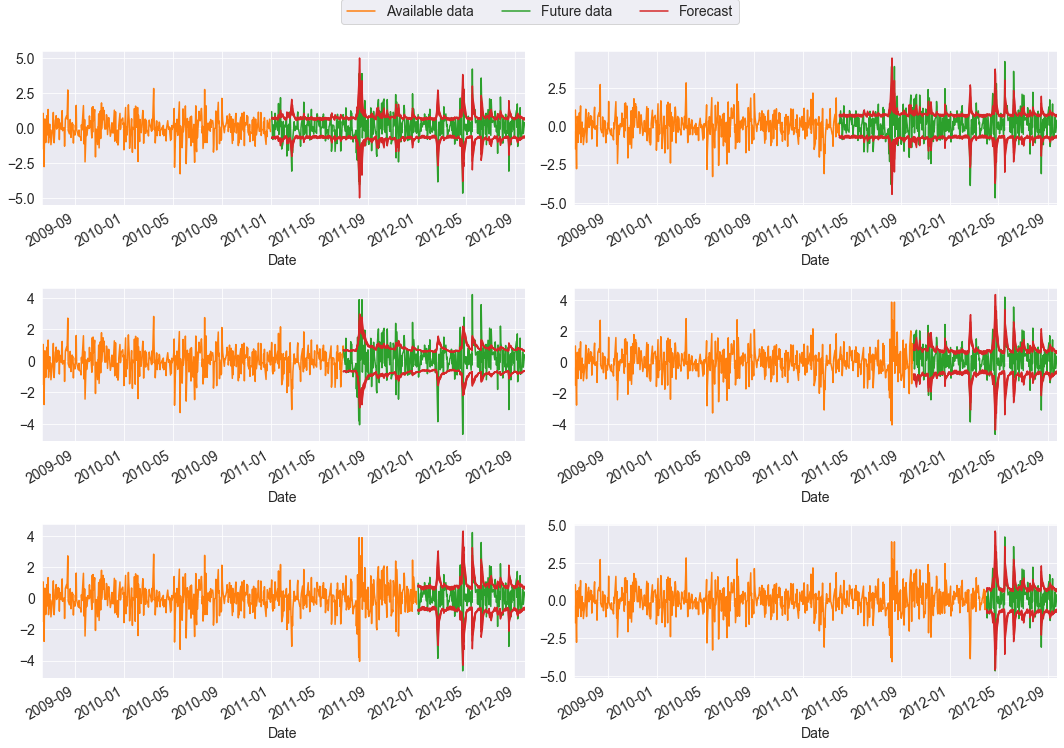

In [32]:
split_dates=[dt.datetime(2011,1,1),dt.datetime(2011,4,1),dt.datetime(2011,7,1),
             dt.datetime(2011,10,1),dt.datetime(2012,1,1),dt.datetime(2012,4,1)]
rows=3
cols=2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
for index, split_date in enumerate(split_dates):
    res_wmt = garch_wmt.fit(update_freq=0, disp='off', last_obs=split_date)
    forecasts = res_wmt.forecast(horizon=5, start=split_date)
    cur_plot = returns['WMT'][:split_date].plot(ax=axes[index//cols,index%cols],color="tab:orange")
    fut_plot = returns['WMT'][split_date:].plot(ax=axes[index//cols,index%cols],color="tab:green")
    for_plot = forecasts.variance[split_date:].plot(ax=axes[index//cols,index%cols],color="tab:red")
    (-1.0*forecasts.variance[split_date:]).plot(ax=axes[index//cols,index%cols],color="tab:red")
    axes[index//cols,index%cols].legend().remove()
    plt.tight_layout()
fig.legend([cur_plot, fut_plot, for_plot], 
           labels = ['Available data', 'Future data','Forecast'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3)
plt.show()

In [33]:
future_wmt = pdr.get_data_yahoo("WMT", start="2012-09-26", end="2013-09-25")['Adj Close']
future_returns_wmt = 100 * future_wmt.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


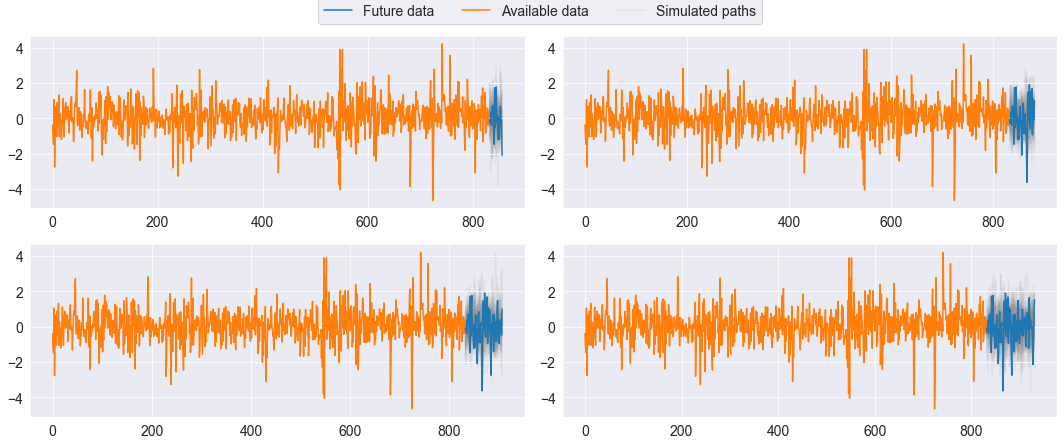

In [34]:
steps_v = [25,50,75,100]
n_sim=20
rows=2
cols=2
cur = returns['WMT'].values
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,6))
for index, steps in enumerate(steps_v):
    ii=index//cols
    jj=index%cols
    x=range(len(cur),len(cur)+steps)
    forecasts = res_wmt.forecast(horizon=steps, method='simulation', simulations=n_sim)
    sims = forecasts.simulations.values[-1,:,:].T
    fut = future_returns_wmt[:steps].values
    fut_plot = axes[ii,jj].plot(x,fut,zorder=10)
    cur_plot = axes[ii,jj].plot(cur)
    sim_plot = axes[ii,jj].plot(x,sims, color='gray', alpha=2/n_sim, zorder=0)
plt.tight_layout()
fig.legend([fut_plot, cur_plot, sim_plot[0]], 
           labels = ['Future data','Available data','Simulated paths'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3,
           )
plt.show()

<a class="anchor" id="hd"></a> 
# <center>THE HOME DEPOT</center>
[Back to Table of Contents](#TOC)

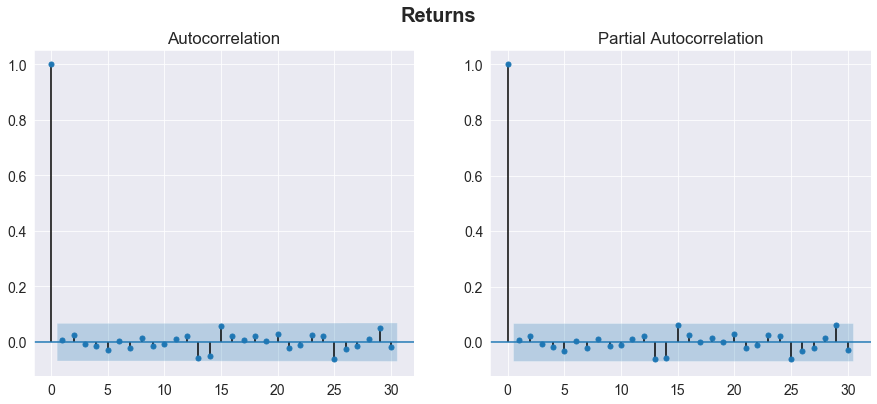

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt.suptitle('Returns', fontweight='bold', fontsize=20)
with mpl.rc_context():
    sm.graphics.tsa.plot_acf(returns['HD'], ax=axes[0])
    sm.graphics.tsa.plot_pacf(returns['HD'], ax=axes[1])

In [36]:
garch_hd = arch.arch_model(returns['HD'], p=1, q=1, vol="GARCH")
res_hd = garch_hd.fit(update_freq=0, disp='off')
print(res_hd)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1448.21
Distribution:                  Normal   AIC:                           2904.42
Method:            Maximum Likelihood   BIC:                           2923.31
                                        No. Observations:                  832
Date:                Tue, Jan 14 2020   Df Residuals:                      828
Time:                        16:46:59   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1671  4.656e-02      3.588  3.331e-04 [7.581e-0

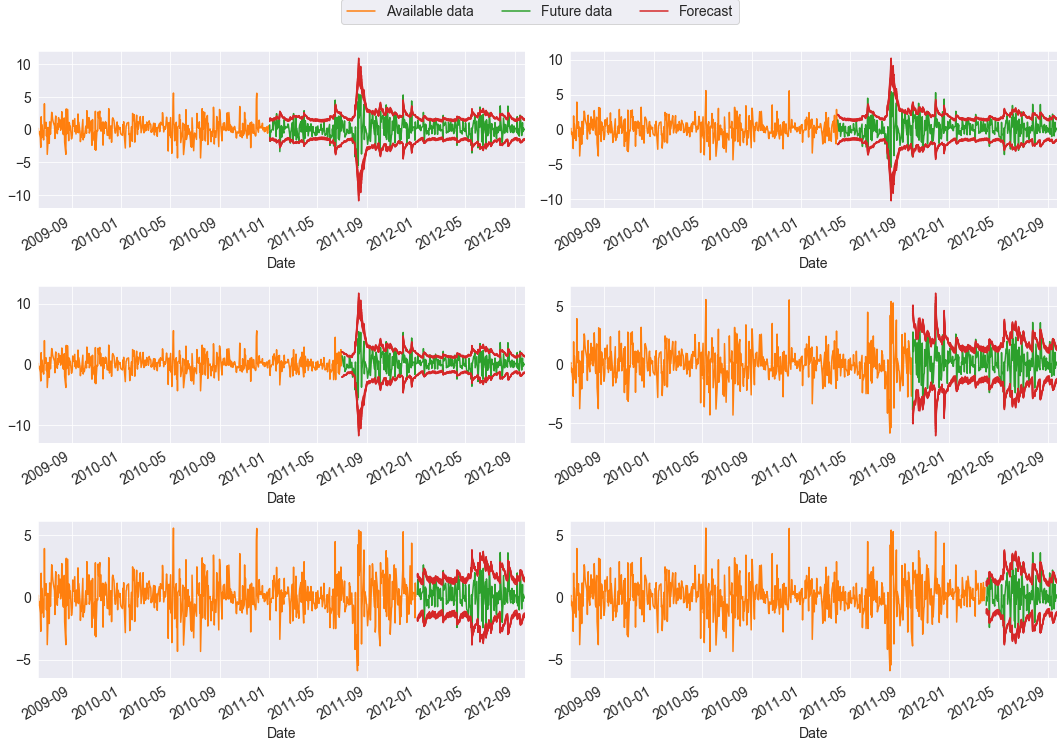

In [37]:
split_dates=[dt.datetime(2011,1,1),dt.datetime(2011,4,1),dt.datetime(2011,7,1),
             dt.datetime(2011,10,1),dt.datetime(2012,1,1),dt.datetime(2012,4,1)]
rows=3
cols=2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
for index, split_date in enumerate(split_dates):
    res_hd = garch_hd.fit(update_freq=0, disp='off', last_obs=split_date)
    forecasts = res_hd.forecast(horizon=5, start=split_date)
    cur_plot = returns['HD'][:split_date].plot(ax=axes[index//cols,index%cols],color="tab:orange")
    fut_plot = returns['HD'][split_date:].plot(ax=axes[index//cols,index%cols],color="tab:green")
    for_plot = forecasts.variance[split_date:].plot(ax=axes[index//cols,index%cols],color="tab:red")
    (-1.0*forecasts.variance[split_date:]).plot(ax=axes[index//cols,index%cols],color="tab:red")
    axes[index//cols,index%cols].legend().remove()
    plt.tight_layout()
fig.legend([cur_plot, fut_plot, for_plot], 
           labels = ['Available data', 'Future data','Forecast'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3)
plt.show()

In [38]:
future_hd = pdr.get_data_yahoo("HD", start="2012-09-26", end="2013-09-25")['Adj Close']
future_returns_hd = 100 * future_hd.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


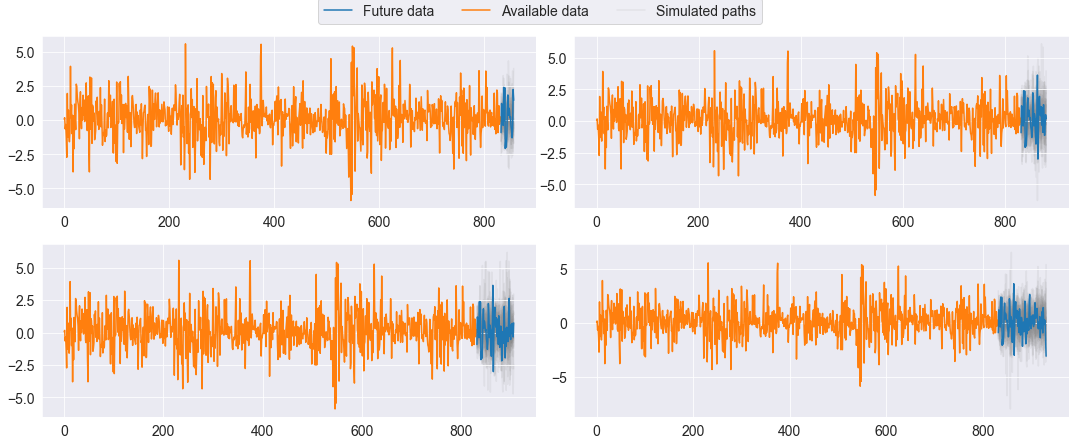

In [39]:
steps_v = [25,50,75,100]
n_sim=20
rows=2
cols=2
cur = returns['HD'].values
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,6))
for index, steps in enumerate(steps_v):
    ii=index//cols
    jj=index%cols
    x=range(len(cur),len(cur)+steps)
    forecasts = res_hd.forecast(horizon=steps, method='simulation', simulations=n_sim)
    sims = forecasts.simulations.values[-1,:,:].T
    fut = future_returns_hd[:steps].values
    fut_plot = axes[ii,jj].plot(x,fut,zorder=10)
    cur_plot = axes[ii,jj].plot(cur)
    sim_plot = axes[ii,jj].plot(x,sims, color='gray', alpha=2/n_sim, zorder=0)
plt.tight_layout()
fig.legend([fut_plot, cur_plot, sim_plot[0]], 
           labels = ['Future data','Available data','Simulated paths'],
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=3,
           )
plt.show()